We will be using Universal Sentence Encoder from TensorFlow Hub to generate text embeddings.
It is a model which helps us generate embeddings from sentences. Here we will generate the embeddings correspoding to the detail_desc feature i.e the detailed description of articles.

In [ ]:
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import pickle
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

path = 'drive/MyDrive/Product_Recommendation_System/articles.csv'

df = pd.read_csv(path, dtype={'article_id':str}).astype(str)

Loading The Universal Sentence Encoder's Tf Hub Module

In [ ]:
#copying the url of the model
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
#loading the model
model = hub.load(module_url)

In [ ]:
desc = df['detail_desc'].unique()

In [ ]:
embeds = model(desc)
embeds.shape

TensorShape([43405, 512])

Creating a dectionary of descriptions and their corresponding embeddings

In [ ]:
desc_embedding_pairs = {i:embed.numpy() for i, embed in zip(desc, embeds)}

In [ ]:
df = df[['article_id', 'detail_desc']]

In [ ]:
df['embeddings'] = df.detail_desc.map(desc_embedding_pairs)

In [ ]:
df.head()

,article_id,detail_desc,embeddings
0,0108775015,Jersey top with narrow shoulder straps.,"[-0.04385933, 0.054208525, -0.047895834, -0.01..."
1,0108775044,Jersey top with narrow shoulder straps.,"[-0.04385933, 0.054208525, -0.047895834, -0.01..."
2,0108775051,Jersey top with narrow shoulder straps.,"[-0.04385933, 0.054208525, -0.047895834, -0.01..."
3,0110065001,"Microfibre T-shirt bra with underwired, moulde...","[-0.046704307, 0.04259286, -0.065598585, 0.012..."
4,0110065002,"Microfibre T-shirt bra with underwired, moulde...","[-0.046704307, 0.04259286, -0.065598585, 0.012..."


In [ ]:
df = df[['article_id', 'embeddings']]

In [ ]:
df.to_csv('file.csv')

In [ ]:
df.head()

,article_id,embeddings
0,0108775015,"[-0.04385933, 0.054208525, -0.047895834, -0.01..."
1,0108775044,"[-0.04385933, 0.054208525, -0.047895834, -0.01..."
2,0108775051,"[-0.04385933, 0.054208525, -0.047895834, -0.01..."
3,0110065001,"[-0.046704307, 0.04259286, -0.065598585, 0.012..."
4,0110065002,"[-0.046704307, 0.04259286, -0.065598585, 0.012..."


In [ ]:
f = open('article_embeddings_from_text.pickle', 'wb')
pickle.dump(df.values, f)

In [ ]:
trans = pd.read_csv('drive/MyDrive/Product_Recommendation_System/transactions_train.csv', usecols=['customer_id', 'article_id'], dtype=str)

In [ ]:
trans = trans.merge(df, on='article_id').drop('article_id', axis=1)

In [ ]:
trans.shape

(31788324, 2)

In [ ]:
trans.head()

,customer_id,embeddings
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,"[-0.0019754788, 0.015593625, -0.05317287, -0.0..."
1,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,"[-0.0019754788, 0.015593625, -0.05317287, -0.0..."
2,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,"[-0.0019754788, 0.015593625, -0.05317287, -0.0..."
3,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,"[-0.0019754788, 0.015593625, -0.05317287, -0.0..."
4,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,"[-0.0019754788, 0.015593625, -0.05317287, -0.0..."


In [ ]:
customer_embeddings = trans.groupby('customer_id').mean()

In [ ]:
f = open('customer_embeddings_from_text.pickle', 'wb')

In [ ]:
pickle.dump(customer_embeddings, f)

Lets take a look at the embeddings on a 2D dimension

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeds)

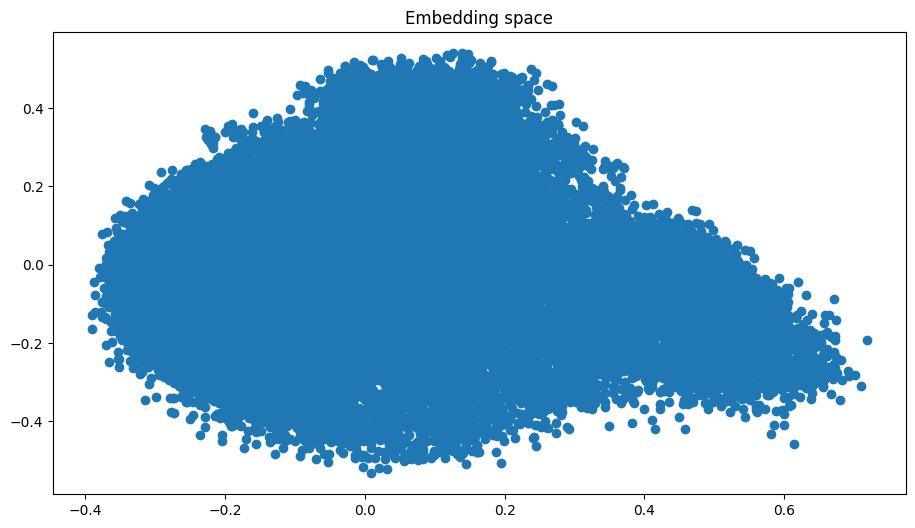

In [ ]:
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()